In [ ]:
#import librarires
!pip install keras-tuner
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from tensorflow.keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,GlobalAveragePooling2D,MaxPool2D,Conv2D
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
import numpy as np


     |████████████████████████████████| 102kB 12.5MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=79447087cff1b79e66155c678b16e5bdbf89a321abb67b8eddb1c3aec9e77680
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from google.colab import files
files.upload()
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d prasadvpatil/mrl-dataset

Saving kaggle.json to kaggle.json
 40% 9.00M/22.6M [00:00<00:00, 34.8MB/s]
100% 22.6M/22.6M [00:00<00:00, 65.1MB/s]


In [ ]:
!unzip mrl-dataset.zip -d mrl-dataset

Archive:  mrl-dataset.zip
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00005_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00008_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00009_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00013_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00014_0_0_0_0_0_01.png  
  inflating: mrl-dataset/train/Closed_Eyes/s0001_00015_0_0_0_0_0_01.png  
  inflating:

In [ ]:
#import train data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "./mrl-dataset/train", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(244, 244), shuffle=True, seed=123,
    validation_split=0.2, subset="training"
)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.


In [ ]:
#import test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "./mrl-dataset/train", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(244, 244), shuffle=True, seed=123,
    validation_split=0.2, subset="validation"
)

Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [ ]:
#classes name
class_names = {0:"closes",1:"open"}
for i in class_names.items():
    print(i)

(0, 'closes')
(1, 'open')


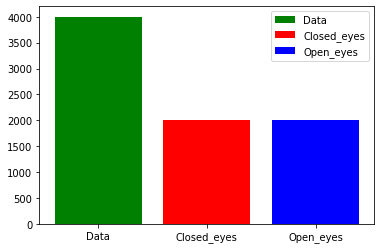

In [ ]:
#visulaize data 
fig, ax = plt.subplots()
ax.bar("Data",4000,label="Data",color="g")
ax.bar("Closed_eyes",2000,label="Closed_eyes",color="r")
ax.bar("Open_eyes",2000,label="Open_eyes",color="b")
ax.legend()

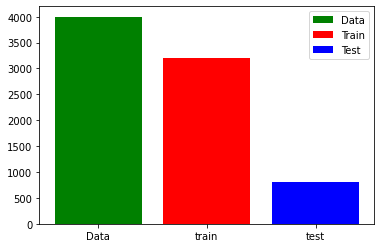

In [ ]:
#visulaize data 
fig, ax = plt.subplots()
ax.bar("Data",4000,label="Data",color="g")
ax.bar("train",3200,label="Train",color="r")
ax.bar("test",800,label="Test",color="b")
ax.legend()

In [ ]:
#build cnn

vgg16_model =VGG16(weights = 'imagenet', include_top = False)
for layer in vgg16_model.layers:
    layer.trainable = False
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(2, activation = 'softmax')(x)
model = Model(inputs = vgg16_model.input, outputs = predictions)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
#compile model
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
#early stop 
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
history=model.fit(train_data,
    validation_data = test_data, 
    callbacks=[early],
    epochs = 50)

Epoch 1/50
100/100 [==============================] - 58s 213ms/step - loss: 0.0491 - accuracy: 0.9828 - val_loss: 0.0065 - val_accuracy: 0.9987
Epoch 2/50
100/100 [==============================] - 22s 214ms/step - loss: 7.0780e-04 - accuracy: 0.9997 - val_loss: 0.0049 - val_accuracy: 0.9987
Epoch 3/50
100/100 [==============================] - 22s 215ms/step - loss: 1.6845e-04 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9987
Epoch 4/50
100/100 [==============================] - 22s 219ms/step - loss: 1.0198e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.9987
Epoch 5/50
100/100 [==============================] - 22s 219ms/step - loss: 7.5325e-05 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.9987
Epoch 6/50
100/100 [==============================] - 22s 222ms/step - loss: 4.6370e-05 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 7/50
100/100 [==============================] - 22s 221ms/step - loss: 3.4313e-05 - accuracy: 1.0000 - v

In [ ]:
#evaluate test_data
model.evaluate(test_data)

25/25 [==============================] - 6s 215ms/step - loss: 0.0039 - accuracy: 0.9987


[0.003871402470394969, 0.9987499713897705]

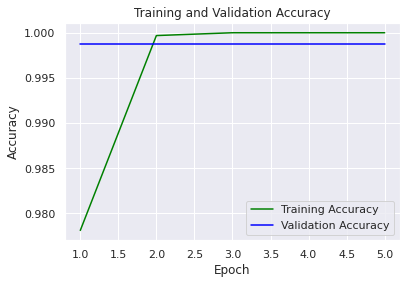

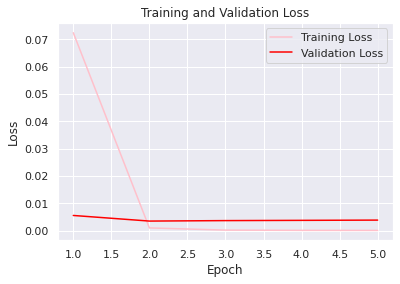

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
#predict model
y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred,axis=1)

(244, 244, 3)
(1, 244, 244, 3)
[0]
closes


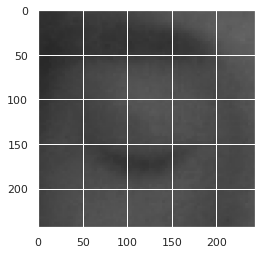

In [ ]:
#example 1
image_path = "./mrl-dataset/train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
print(img.shape)
img = np.expand_dims(img, axis=0)
print(img.shape)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[0]
closes


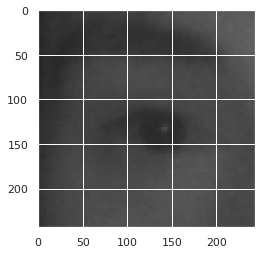

In [ ]:
  #example 6
image_path = "./mrl-dataset/train/Open_Eyes/s0001_02334_0_0_1_0_0_01.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [ ]:
#save model h5 
model.save("model.h5")
# Convert the model to tensorflow lite 
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmp00v1gtzt/assets


In [ ]:
y = np.concatenate([y for x, y in test_data], axis=0)

In [ ]:
p=[np.argmax(x) for x in model.predict_generator(test_data)]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
tf.math.confusion_matrix(y,p) 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[188, 202],
       [203, 207]], dtype=int32)>

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(p,y))

              precision    recall  f1-score   support

           0       0.48      0.48      0.48       391
           1       0.50      0.51      0.51       409

    accuracy                           0.49       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.49      0.49       800

